In [1]:
import numpy as np  ; import os  ; import matplotlib.pyplot as plt
datafile_name = 'berea_mercury_capillary_pressure.txt'
path_to_datafolder = ('E:\\15_REPOS\\00_BETAMI\\w10_______others\\06_MT3D_Wisconsin-Madison\\data_for_models')
current_directory = os.getcwd()
data_file_with_path = os.path.join(current_directory, path_to_datafolder, datafile_name)

In [2]:
Swr = 0.1 ;  Snwr = 0  ; Sw = np.linspace((Swr + 0.001), (1 - Snwr - 0.001), num=100)  ; Pc_entry = 2  ; m = 2    # Pc(kPa) 
def brooks_corey_pc(Sw, Swr, Snwr, Pc_entry, m):
    Se = (Sw - Swr)/((1 - Snwr) - Swr)            
    Pc = Pc_entry*(Se**(-1/m))
    return Pc

In [3]:
A = np.linspace(15, (10), num=5)   #;  A
Se = (Sw - Swr)/((1 - Snwr) - Swr)  ; Pc = Pc_entry*(Se**(-1/m))   # ; Pc

Text(0, 0.5, 'Cap. P (PSI)')

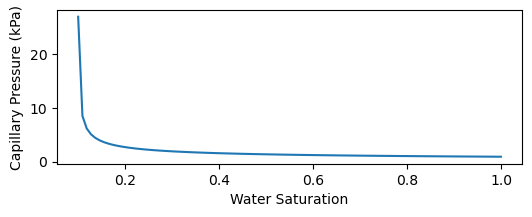

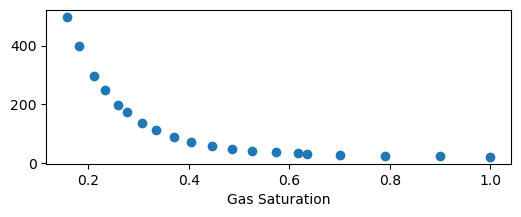

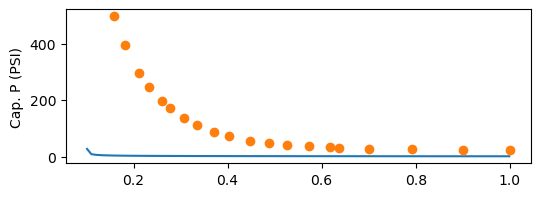

In [4]:
Pc_entry_bc = 0.9; m_bc = 2              ;  Pc_bc = brooks_corey_pc(Sw, Swr, Snwr, Pc_entry_bc, m_bc)
plt.figure(figsize=(6, 2), dpi=100)      ; plt.plot(Sw, Pc_bc) ; plt.xlabel('Water Saturation') ; plt.ylabel('Capillary Pressure (kPa)')

pc_data = np.loadtxt(data_file_with_path, delimiter='\t')  ; Sw_micp = pc_data[:,0]  ; Pc_micp = pc_data[:,1]                                                

plt.figure(figsize=(6, 2), dpi=100)  ;  plt.plot(Sw_micp, Pc_micp, 'o')     ; plt.xlabel('Gas Saturation', fontsize=10)            
plt.figure(figsize=(6, 2), dpi=100)  ; C1 = plt.plot(Sw, Pc_bc)   ; C2 = plt.plot(Sw_micp, Pc_micp, 'o') ; plt.ylabel('Cap. P (PSI)', fontsize=10)

In [5]:
Snwr = 0                             # Sw = 1 ... at some point we know that the residual nonwetting saturation = 0
Pc_entry = np.min(Pc_micp)           # PSI    # capillary entry pressure .... at ... the mimimum capillary pressure measurement
print('approximation of capillary entry pressure = ' + str(Pc_entry) + ' PSI')

approximation of capillary entry pressure = 21.46641731 PSI


**Great!**

The best fit Swr is equal to 0.0693347237894737
The best fit m is equal to 0.7333333333333333


C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_9156\2705883812.py:4: RuntimeWarning: invalid value encountered in power
  Pc = Pc_entry*(Se**(-1/m))


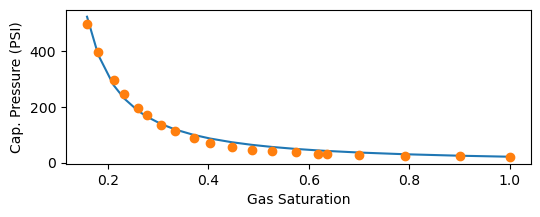

In [10]:
M = np.linspace(0.1, 2, num=100)   ; SWR = np.min(Sw_micp) + np.linspace(-0.1, 0.1, num=20)     ; least_square_min = 10000
for m in M:
    for Swr in SWR:
        Pc_bc = brooks_corey_pc(Sw_micp, Swr, Snwr, Pc_entry, m)
        least_square_m = np.sum((Pc_bc- Pc_micp)**2)
        if least_square_m < least_square_min:
            least_square_min = least_square_m
            min_m = m
            min_Swr = Swr
Pc_fit = brooks_corey_pc (Sw_micp, min_Swr, Snwr, Pc_entry,   min_m)
plt.figure(figsize=(6, 2), dpi=100)                    ; plt.plot   ( Sw_micp, Pc_fit )                       ; plt.plot(Sw_micp, Pc_micp, 'o')
plt.xlabel('Gas Saturation', fontsize=10)              ; plt.ylabel ('Cap. Pressure (PSI)', fontsize=10)
print('The best fit Swr is equal to ' + str(min_Swr))  ; print('The best fit m is equal to ' + str(min_m))

## Activity: Scaling capillary pressure measurements

As we see with the data above, capillary pressure is usually measured in the laboratory with air-water or air-mercury fluid pairs. To apply these measurements to different fluid pairs, for example a NAPL and water, it is necessary to scale the capillary pressure data. As described in the course notes, the equation to scale capillary pressure is $Pc_{scaled} = Pc_{measured} \frac{\sigma_{scaled} \text{cos}\theta_{scaled}}{\sigma_{measured} \text{cos}\theta_{measured}}$. Here the subscript 'scaled' refers to the fluid pairs we want to calculate for and the subscript 'measured' applies to the fluid pairs used for the capillary pressure measurement.

Using the capillary function that you fit above, scale the data from air-mercury to air-water. Assume the contact angle of air-water is 10 degrees ($\theta_{scaled}$), the contact angle of air-mercury is 140 degrees ($\theta_{measured}$). The interfacial tension of air-water is 72 mN/m ($\sigma_{scaled}$), the interfacial tension of air-mercury is 485 mN/m ($\sigma_{measured}$).

In [7]:
def scale_pc_fun(Pc, sig_scaled, sig_measured, theta_scaled, theta_measured):      # capillary pressure scaling
    # Pc_scaled =  ## Input scaling equation
    return Pc_scaled
print((np.cos(140*2*3.1415/360)))
print((np.cos((180-140)*2*3.1415/360)))
# Pc_scaled = scale_pc_fun(Pc_fit, other input...)                 # Now call function
# Pc_micp_scaled = scale_pc_fun(Pc_micp, other input...)
# Pc_scaled_kpa = Pc_scaled*6.89                                   # convert from psi to kPa 
# Pc_micp_scaled_kpa = Pc_micp_scaled*6.89

-0.7659981193458398
0.7660576777520476


Now plot the results!

Plot the results for another fluid pair based on the NAPL contact angle and interfacial tension (IFT). How does decreasing the contact angle (changing wettability) change the capillary pressure curves? 